In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Feature Engineering

In [ ]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
df = df.rename(columns = {'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Exploratory Analysis

<ipython-input-20-efab599863ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data= df, palette = 'GnBu')


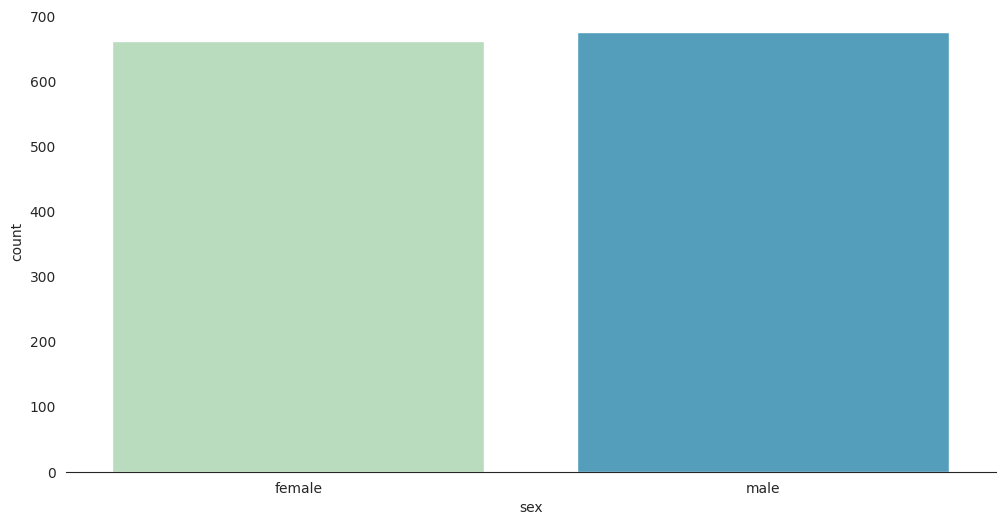

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

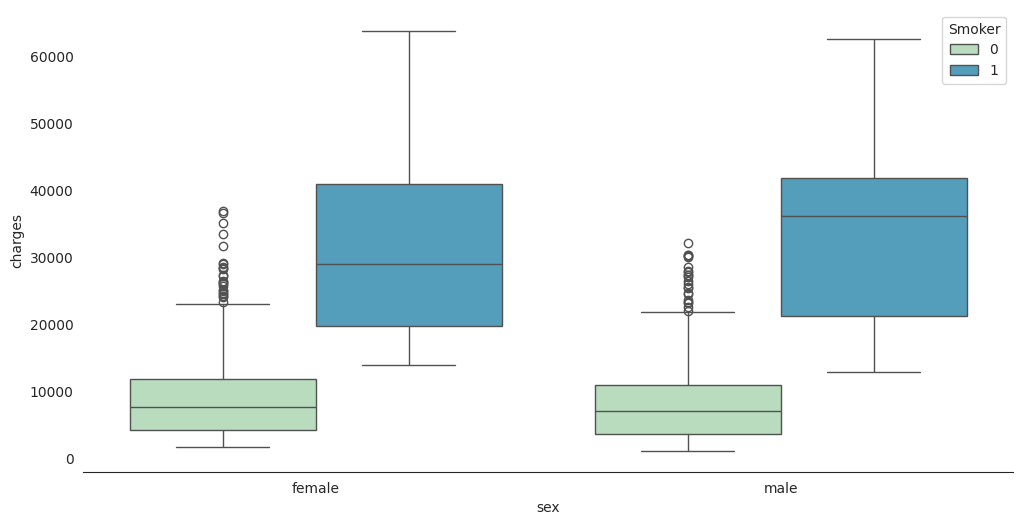

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

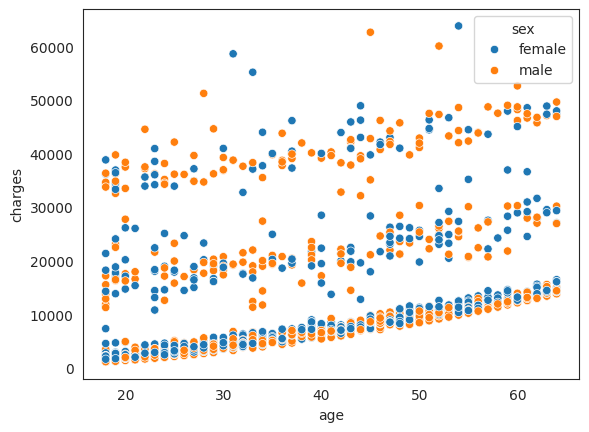

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

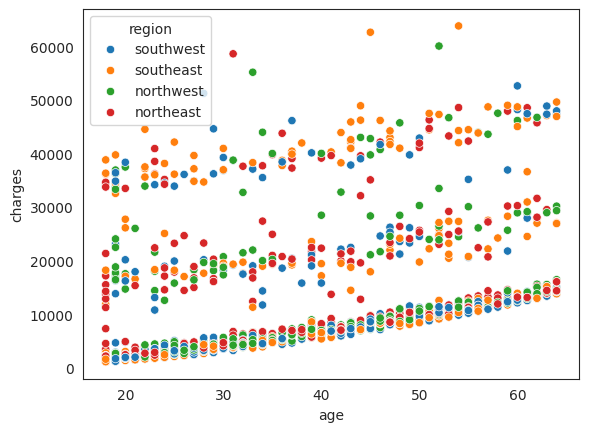

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<Axes: xlabel='age', ylabel='charges'>

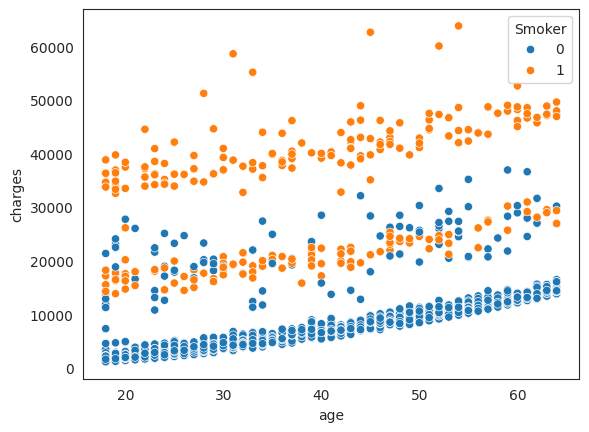

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

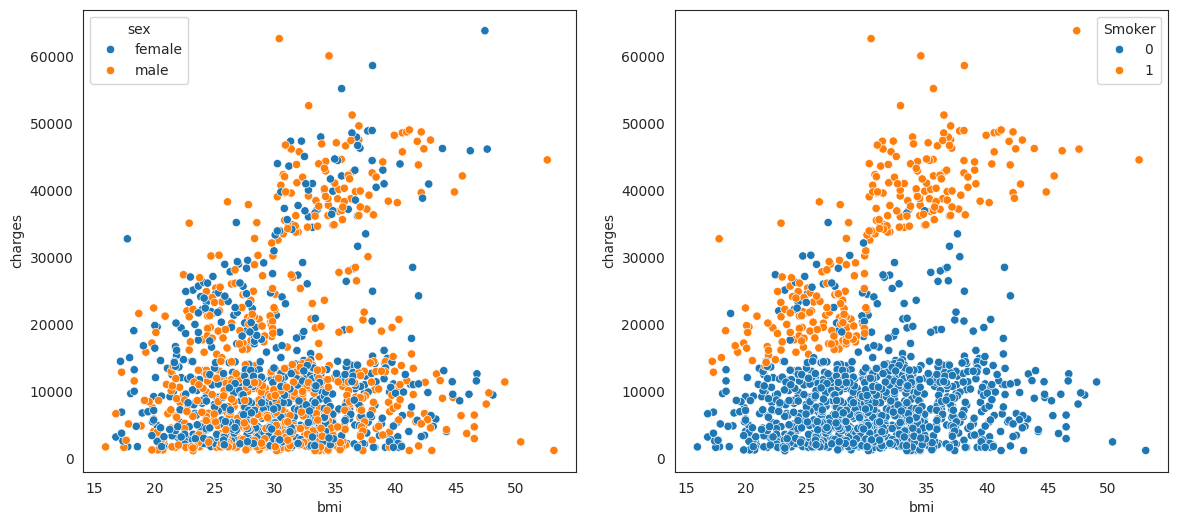

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

In [ ]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<Axes: >

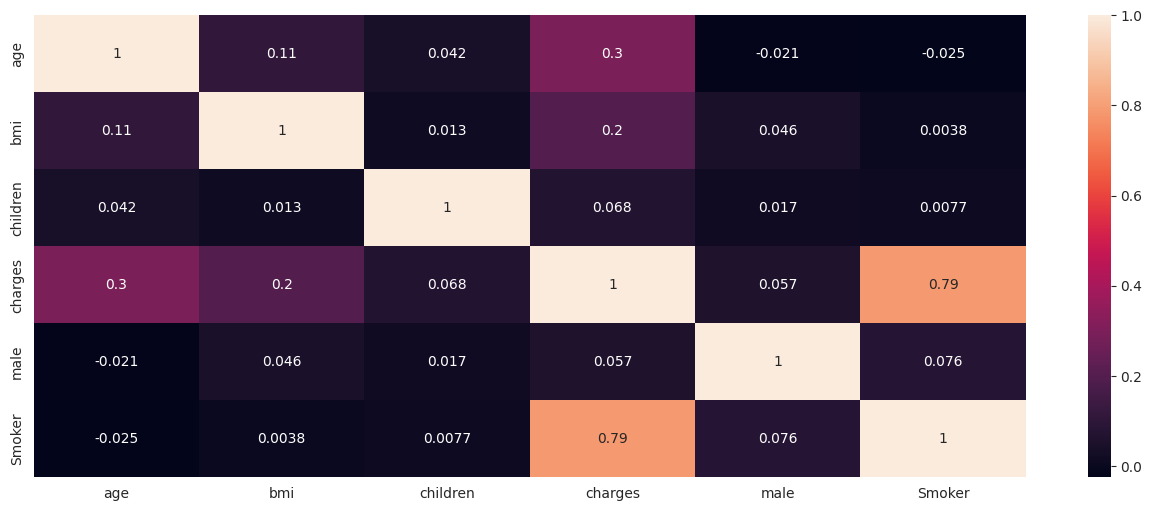

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

Splitting Data

In [ ]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [ ]:

x_train.shape

(802, 5)

Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [ ]:
scaled_x_train

array([[ 1.31042601,  1.8336601 , -0.07722767,  0.9900742 ,  2.03495102],
       [ 0.51675731, -0.47180602, -0.07722767, -1.01002531, -0.49141232],
       [ 1.38257771, -0.87498261, -0.90304893, -1.01002531, -0.49141232],
       ...,
       [-0.78197329, -0.2862168 , -0.07722767, -1.01002531, -0.49141232],
       [ 1.23827431, -0.3774115 , -0.90304893, -1.01002531, -0.49141232],
       [ 1.16612261,  0.51373675,  1.57441483,  0.9900742 , -0.49141232]])

Support Vector Regression Model

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [ ]:
predict

array([8915.95897538, 8996.32626193, 8954.52071673, 9016.0186961 ,
       8873.47329437, 8929.98700907, 8895.55686163, 8993.35986262,
       8979.73092052, 8895.41999944, 9018.76124031, 8982.08058018,
       9012.93888198, 8936.18670901, 8930.21104893, 8883.13673097,
       8982.8906311 , 8898.95576313, 8871.8601078 , 8985.11541253,
       8869.56233088, 8916.1909679 , 8933.5716031 , 8940.31986215,
       9003.41966966, 9008.79272874, 9023.3553865 , 8877.90366619,
       9021.11008418, 8976.94365618, 9007.89489841, 8884.40361363,
       8904.52725784, 9004.19182651, 8919.67435055, 8943.93236874,
       9001.9232836 , 8923.45732481, 8938.13286759, 9016.76539785,
       8859.07776963, 8922.86591089, 8997.0669662 , 8910.80593829,
       9017.5362726 , 8920.70127658, 8991.31697343, 8882.29403805,
       8894.63633622, 8952.96416089, 8986.41570245, 8889.33186417,
       8950.40989114, 8908.23684883, 8932.12253484, 8988.87000067,
       8985.03978659, 8907.86807316, 8873.90170858, 8985.33398

In [ ]:
y_test

523      5397.61670
62      30166.61817
1293     9301.89355
1176    23887.66270
439      2897.32350
           ...     
315      9722.76950
1130     8582.30230
697     40273.64550
349      1635.73365
1276     2741.94800
Name: charges, Length: 536, dtype: float64

In [ ]:
np.mean((y_test - predict)**2)

180273946.93347168

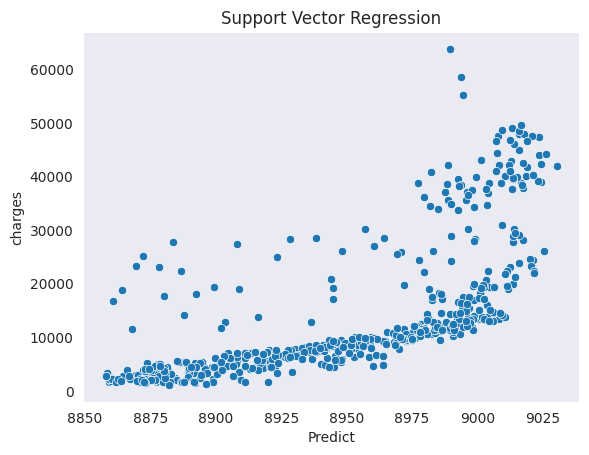

In [ ]:
sns.set_style('dark')
f = sns.scatterplot(x=predict, y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')
plt.show()